# CUSTOMER PERSONALITY ANALYSIS

## ABOUT DATA
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## CONTENT

People

ID: Customer's unique identifier,
Year_Birth: Customer's birth year,
Education: Customer's education level,
Marital_Status: Customer's marital status,
Income: Customer's yearly household income,
Kidhome: Number of children in customer's household,
Teenhome: Number of teenagers in customer's household,
Dt_Customer: Date of customer's enrollment with the company,
Recency: Number of days since customer's last purchase,
Complain: 1 if the customer complained in the last 2 years, 0 otherwise


Products

MntWines: Amount spent on wine in last 2 years,
MntFruits: Amount spent on fruits in last 2 years,
MntMeatProducts: Amount spent on meat in last 2 years,
MntFishProducts: Amount spent on fish in last 2 years,
MntSweetProducts: Amount spent on sweets in last 2 years,
MntGoldProds: Amount spent on gold in last 2 years


Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise,
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise,
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise,
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise,
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwiseZ,
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


Place

NumWebPurchases: Number of purchases made through the company’s website,
NumCatalogPurchases: Number of purchases made using a catalogue,
NumStorePurchases: Number of purchases made directly in stores,
NumWebVisitsMonth: Number of visits to company’s website in the last month

## KEY OBJECTIVES

1. Perform exploratory data analysis (EDA) to identify trends in customer characteristics.

2. Clean and preprocess data, including feature engineering and encoding.

3. Build and evaluate classification models (Logistic Regression, Random Forest, XGBoost) to predict customer response.

4. Tune hyperparameters for model optimization and compare model performances.

5. Visualize results for both technical and non-technical stakeholders.

In [200]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [24]:
# loading dataset
customer_data = pd.read_csv("marketing_campaign.csv")

# checking customer_data to see if loaded
print(customer_data.shape)
customer_data.head()

(2240, 1)


,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


Seems the dataset only has one column because it is a tab separated file and not a comma separated file. Must split the column using the forward slash delimiter

In [29]:
# spliting customer_data into its various columns
customer_data = pd.read_csv('marketing_campaign.csv', sep='\t')
print(customer_data.shape)
customer_data

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


customer_data now has 2240 rows and 29 columns. Problem fixed

### DATA CLEANING 

In [33]:
# checking if customer_data has duplicate values
customer_data.duplicated().sum()

0

No duplicates found

In [36]:
# checking datatypes 
customer_data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Some data types need to be changed. These are the Education, Marital_Status, Kidhome, Teenhome, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain and Response columns

In [39]:
# changing data types
customer_data["Education"] = customer_data["Education"].astype("category")
customer_data["Marital_Status"] = customer_data["Marital_Status"].astype("category")
customer_data["AcceptedCmp3"] = customer_data["AcceptedCmp3"].astype("category")
customer_data["AcceptedCmp4"] = customer_data["AcceptedCmp4"].astype("category")
customer_data["AcceptedCmp5"] = customer_data["AcceptedCmp5"].astype("category")
customer_data["AcceptedCmp1"] = customer_data["AcceptedCmp1"].astype("category")
customer_data["AcceptedCmp2"] = customer_data["AcceptedCmp2"].astype("category")
customer_data["Complain"] = customer_data["Complain"].astype("category")
customer_data["Response"] = customer_data["Response"].astype("category")

customer_data.dtypes

ID                        int64
Year_Birth                int64
Education              category
Marital_Status         category
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer              object
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3           category
AcceptedCmp4           category
AcceptedCmp5           category
AcceptedCmp1           category
AcceptedCmp2           category
Complain               category
Z_CostContact             int64
Z_Revenue                 int64
Response               category
dtype: object

In [41]:
# checking customer_data information  
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   category
 3   Marital_Status       2240 non-null   category
 4   Income               2216 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

The Income column has 24 null values. Must inspect the column to see if i can replace the values with the mean or median since the Income column is an important column for the analysis

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


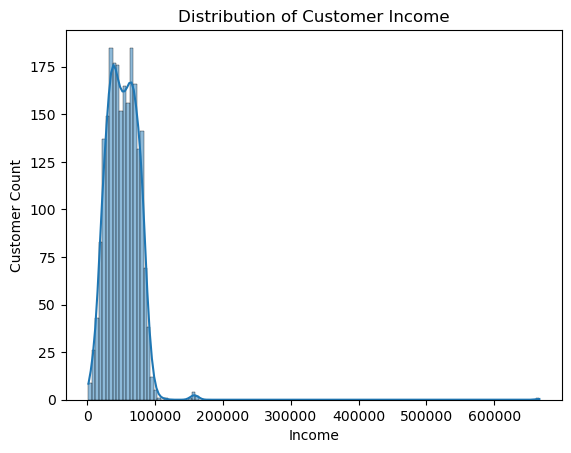

In [44]:
#checking summary statistics of income column
print(customer_data["Income"].describe())

# using a histogram to chesk the distribution of income column
sns.histplot(customer_data['Income'], kde=True, edgecolor='black')

plt.grid(False) 
plt.title('Distribution of Customer Income')
plt.xlabel('Income')
plt.ylabel('Customer Count')
plt.show()

The histogram above is right skewed. Most of the customers earn between ~35k and ~68k however, the maximum income recorded was 666666.000000 which is far too big and different from the rest of the values making it an outlier. Outliers affect the mean value and makes the data skewed as such using the mean to replace the missing values would not be ideal. Therefore the median would be preffered to replace the null values(less sensitive to extreme values than mean).

In [47]:
# finding the median of the Income column and replacing the null values with it
median_val = customer_data["Income"].median()
customer_data.fillna({"Income": median_val}, inplace=True)

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   category
 3   Marital_Status       2240 non-null   category
 4   Income               2240 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

In [55]:
# Removing income extreme outliers
customer_data=customer_data[customer_data['Income']<200000]

count      2239.000000
mean      51963.554712
std       21410.672116
min        1730.000000
25%       35533.500000
50%       51381.500000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64


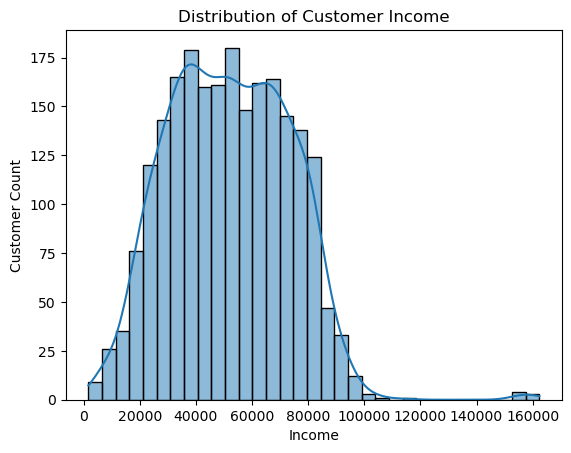

In [57]:
#checking summary statistics of income column after extreme outlier removed
print(customer_data["Income"].describe())

# using a histogram to chesk the distribution of income column
sns.histplot(customer_data['Income'], kde=True, edgecolor='black')

plt.grid(False) 
plt.title('Distribution of Customer Income')
plt.xlabel('Income')
plt.ylabel('Customer Count')
plt.show()

In [173]:
import dtale
dtale.show(customer_data)

### EXPLORATORY DATA ANALYSIS AND VISUALISATIONS

Next, an age column will make it easier to analyze and segment customers than working with birth years directly.

In [63]:
# creating age column
customer_data["Age"] = 2025 - customer_data["Year_Birth"]
customer_data["Age"].describe()

count    2239.000000
mean       56.197856
std        11.985494
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64

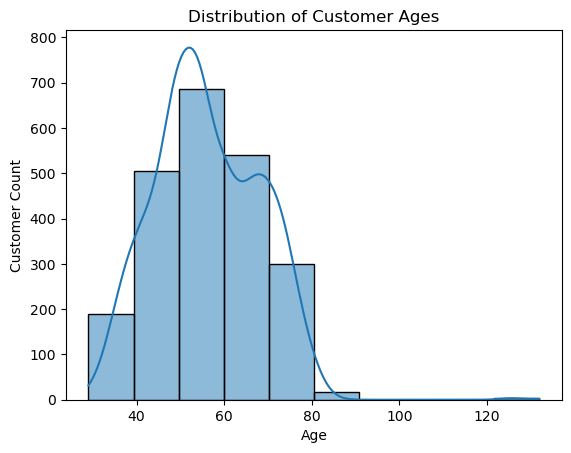

In [65]:
# visualising age distribution 
sns.histplot(customer_data['Age'], bins=10, kde=True, edgecolor='black')

plt.grid(False) 
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.show()

The average customer age is 56 years old. The standard deviation is 12 years — this means there's a decent spread in ages. The youngest customer is 29 years old. 25% of customers are 48 or younger. 50% (the median) are 55 or younger. Half are older.75% are 66 or younger, meaning the top 25% are over 66. The oldest "customer" is 132 years old — 🛑 this seems unrealistic! The max value of 132 likely indicates an incorrect birth year (e.g., a data error like a wrong or missing value). Further investigations must be carried to filter out unusually high ages

In [68]:
# finding customers more than 1oo years old
aged_customers = customer_data.loc[customer_data["Age"] > 100]
aged_customers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,0,0,1,3,11,0,125
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,0,3,11,0,132
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,0,0,1,0,0,0,3,11,0,126


For this group of clients who are more than 100 years old, maybe a mistake of data entry. These rows will be removed since they are only a few.

In [73]:
# remove unrealistic ages
customer_data = customer_data[customer_data['Age'] <= 100]

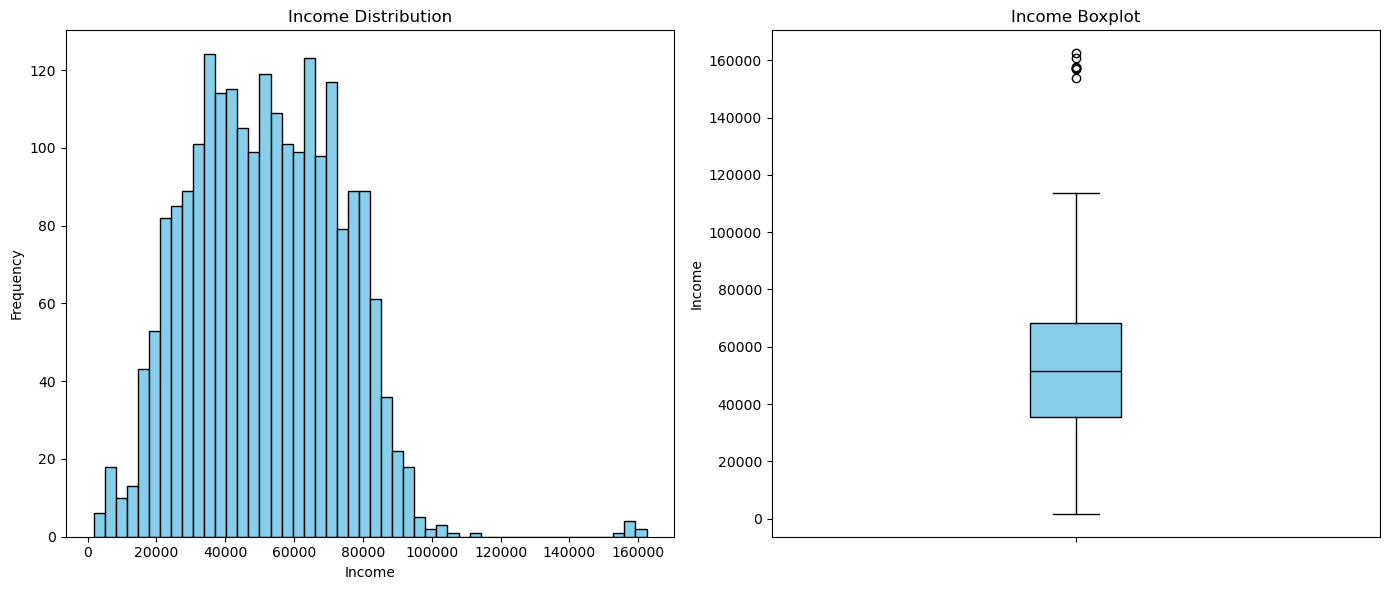

In [75]:
# Set up the figure with 1 row, 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram
axes[0].hist(customer_data["Income"], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title("Income Distribution")
axes[0].set_xlabel("Income")
axes[0].set_ylabel("Frequency")

# Boxplot
axes[1].boxplot(customer_data["Income"], vert=True, patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axes[1].set_title("Income Boxplot")
axes[1].set_ylabel("Income")
axes[1].set_xticks([1])
axes[1].set_xticklabels([''])

plt.tight_layout()
plt.show()


**Exploring Age vs. Income**

In [78]:
# finfing correlation between age and income of customers
correlation = customer_data['Age'].corr(customer_data['Income'])
print("Correlation between Age and Income:", correlation)


Correlation between Age and Income: 0.19883507696028258


<Figure size 1000x600 with 0 Axes>

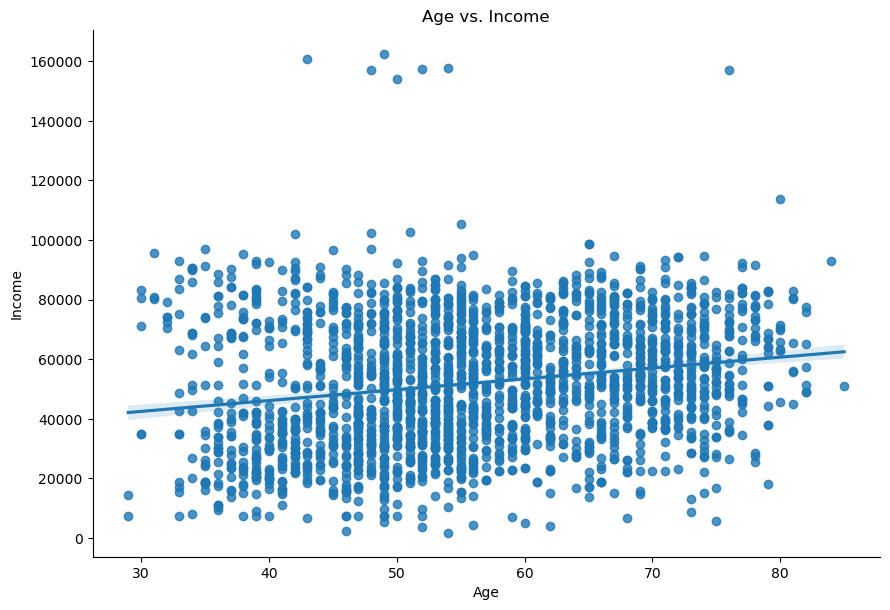

In [80]:
# visualising correlation using scatter plot
plt.figure(figsize=(10,6))
sns.lmplot(x='Age', y='Income', data=customer_data, height=6, aspect=1.5)
plt.title('Age vs. Income')
plt.grid(False)
plt.show()

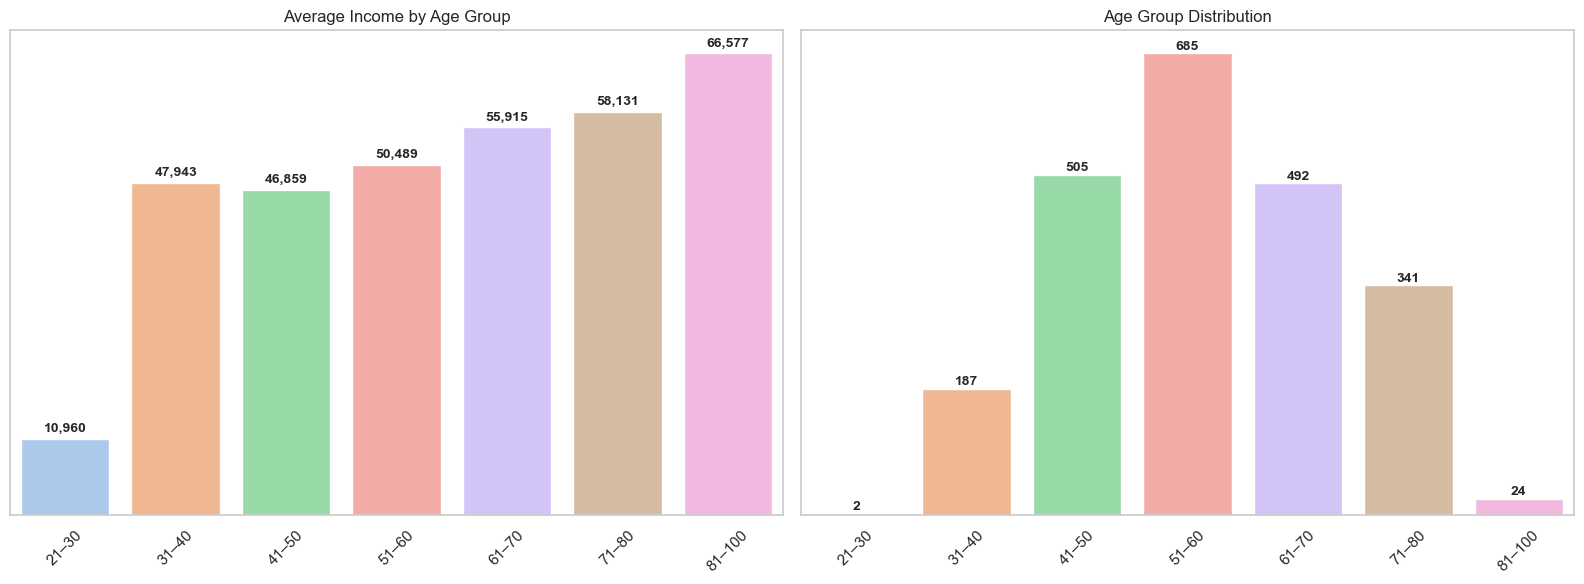

In [82]:
# Average income versus age groups
# Create age bins
bins = [20, 30, 40, 50, 60, 70, 80, 100]
labels = ['21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–100']
customer_data['Age_Group'] = pd.cut(customer_data['Age'], bins=bins, labels=labels, right=False)

# Set style
sns.set(style="whitegrid")

# Prepare data
age_group_income = customer_data.groupby('Age_Group')['Income'].mean().reset_index()
age_group_counts = customer_data['Age_Group'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['Age_Group', 'Count']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot: Average Income by Age Group
sns.barplot(x='Age_Group', y='Income', data=age_group_income, palette='pastel', ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('Average Income by Age Group')
axes[0].set_yticks([])
axes[0].tick_params(axis='x', rotation=45)
# Add data labels with comma separators
for i, row in age_group_income.iterrows():
    axes[0].text(i, row['Income'] + 1000, f"{row['Income']:,.0f}", ha='center', fontsize=10, fontweight='bold')

# Barplot: Age Group Distribution
sns.barplot(x='Age_Group', y='Count', data=age_group_counts, palette='pastel', ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('Age Group Distribution')
axes[1].set_yticks([])
axes[1].tick_params(axis='x', rotation=45)
# Add data labels with comma separators
for i, row in age_group_counts.iterrows():
    axes[1].text(i, row['Count'] + 5, f"{row['Count']:,}", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

💡 Insights: 

📈 **Income Increases With Age:**

There's a clear upward trend in average income from age 31 to 100.

Suggests that older customers tend to earn more or are in a more stable financial situation (e.g., pensions, investments, or senior roles before retirement).

🥇 **Age 51–60: The Power Segment**

Highest count (685 customers) with strong income (~GHS 50,488).

This group should be a primary marketing target — large base and high purchasing power.

📊 **Age 71–100: Fewer but Wealthier**

Despite smaller counts, the average income is the highest here.

These could be high-net-worth retirees or legacy customers. Consider premium services or exclusive offers.

🧠 **Age 31–50: Next Growth Segment**

Good population base with decent income (~GHS 47K).

Could be upgraded to premium tiers or encouraged to engage more via targeted upselling.

🚩 **Age 21–30: Untapped Market**

Very low count (only 2) and income (~GHS 11K).

Either underrepresented in the market or services are not appealing to them.

Investigate whether they’re being reached via appropriate channels (e.g., social media, mobile-first platforms).

🎯 **Strategic Recommendations**
Personalize campaigns by age group — don’t use a one-size-fits-all strategy.

Focus retention efforts on 51–60 and 61–70 groups.

Design entry-level offers for younger audiences (21–40) to expand base.

Consider exclusive or loyalty packages for older, wealthier segments (71+).

EDUCATION VERSUS INCOME 👇

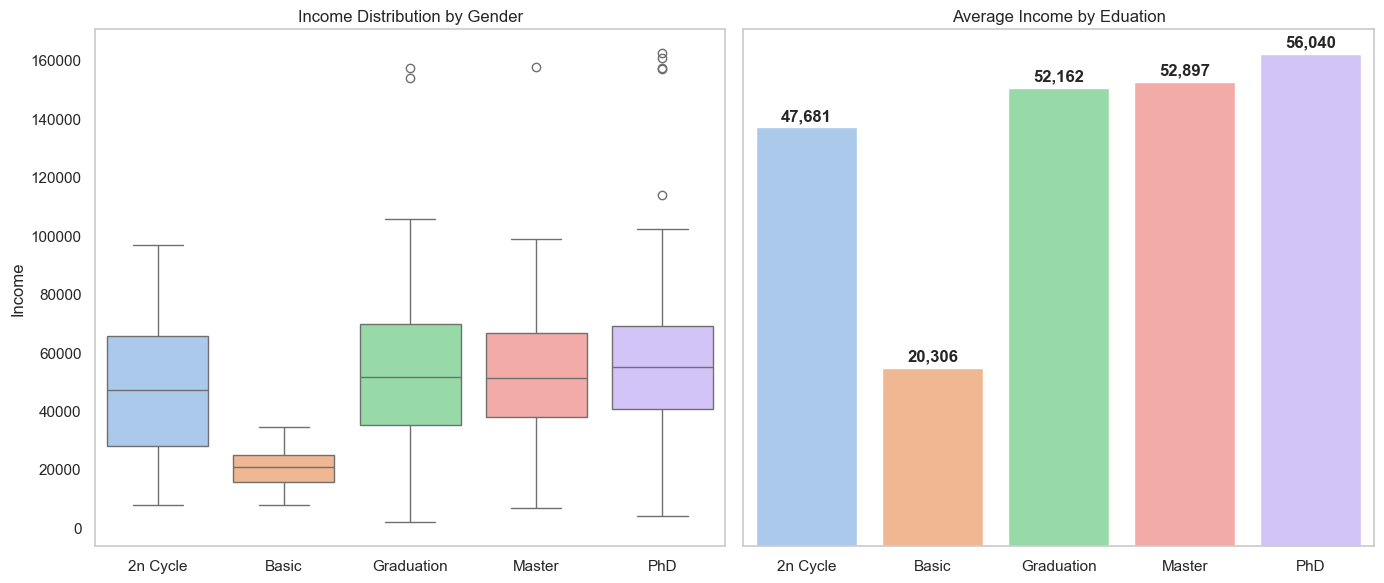

In [98]:
# Grouped data for average income by education
education_income = customer_data.groupby('Education')['Income'].mean().reset_index()

# Set up the figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Boxplot on the left ---
sns.boxplot(x='Education', y='Income', data=customer_data, palette='pastel', ax=axes[0])
axes[0].set_title('Income Distribution by Gender')
axes[0].set_xlabel('')
axes[0].set_ylabel('Income')
axes[0].grid(False)

# --- Barplot on the right ---
sns.barplot(x='Education', y='Income', data=education_income, palette='pastel', ax=axes[1])

# Add data labels
for index, row in education_income.iterrows():
    axes[1].text(index, row['Income'] + 500, f"{row['Income']:,.0f}", ha='center', va='bottom', fontweight='bold')

axes[1].set_title('Average Income by Eduation')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_yticks([])
axes[1].grid(False)

plt.tight_layout()
plt.savefig('average_income_by_education.png', dpi=300, bbox_inches='tight') 
plt.show()

Insights:

Higher education levels clearly correlate with higher average income, with PhD holders earning the highest average income ($56,040).
There's a significant jump between Basic education ($20,306) and 2n Cycle education ($47,681).
Graduate, Master's, and PhD levels show incremental increases in average income.
The box plots reveal that while higher education generally yields higher median incomes, there's considerable income variation within each education level.
All education levels show outliers at the upper income ranges, particularly visible in the Graduate, Master's and PhD categories.

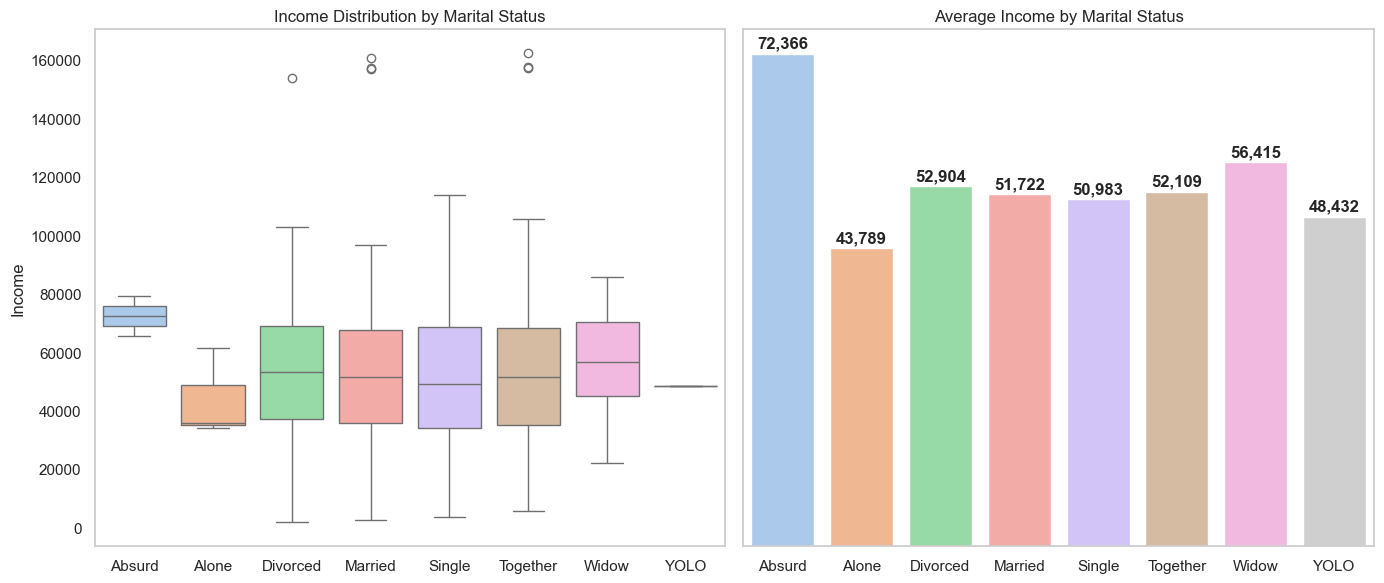

In [94]:
# average income by marital status
Marital_Status_income = customer_data.groupby('Marital_Status')['Income'].mean().reset_index()

# Set up the figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Boxplot on the left ---
sns.boxplot(x='Marital_Status', y='Income', data=customer_data, palette='pastel', ax=axes[0])
axes[0].set_title('Income Distribution by Marital Status')
axes[0].set_xlabel('')
axes[0].set_ylabel('Income')
axes[0].grid(False)

# --- Barplot on the right ---
sns.barplot(x='Marital_Status', y='Income', data=Marital_Status_income, palette='pastel', ax=axes[1])

# Add data labels
for index, row in Marital_Status_income.iterrows():
    axes[1].text(index, row['Income'] + 500, f"{row['Income']:,.0f}", ha='center', va='bottom', fontweight='bold')

axes[1].set_title('Average Income by Marital Status')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_yticks([])
axes[1].grid(False)

plt.tight_layout()
plt.savefig('average_income_by_marital_status.png', dpi=300, bbox_inches='tight') 
plt.show()


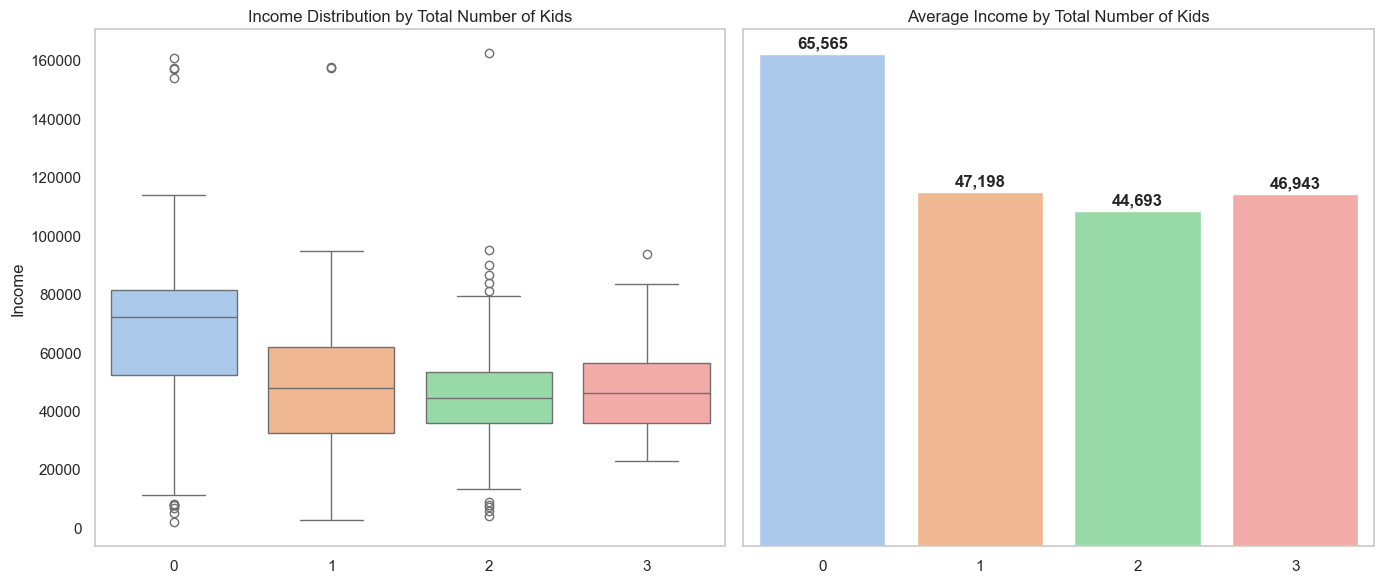

In [96]:
# Kids versus income
# Create a new column for total kids at home
customer_data['Total_Kids'] = customer_data['Kidhome'].astype(int) + customer_data['Teenhome'].astype(int)

# Grouped data for average income by total number of kids
kids_income = customer_data.groupby('Total_Kids')['Income'].mean().reset_index()

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Boxplot on the left ---
sns.boxplot(x='Total_Kids', y='Income', data=customer_data, palette='pastel', ax=axes[0])
axes[0].set_title('Income Distribution by Total Number of Kids')
axes[0].set_xlabel('')
axes[0].set_ylabel('Income')
axes[0].grid(False)

# --- Barplot on the right ---
sns.barplot(x='Total_Kids', y='Income', data=kids_income, palette='pastel', ax=axes[1])

# Add data labels on top of bars
for i, row in kids_income.iterrows():
    axes[1].text(i, row['Income'] + 500, f"{row['Income']:,.0f}", ha='center', va='bottom', fontweight='bold')

axes[1].set_title('Average Income by Total Number of Kids')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_yticks([])
axes[1].grid(False)

plt.tight_layout()
plt.savefig('average_income_by_total_number_kids.png', dpi=300, bbox_inches='tight') 
plt.show()


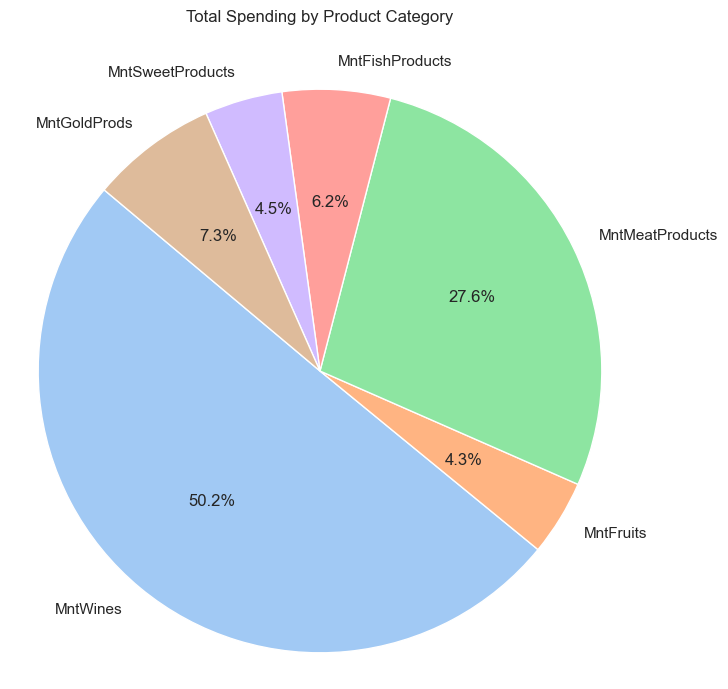

In [100]:
# Create Total_Spend column
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

customer_data['Total_Spent'] = (
    customer_data['MntWines'] +
    customer_data['MntFruits'] +
    customer_data['MntMeatProducts'] +
    customer_data['MntFishProducts'] +
    customer_data['MntSweetProducts'] +
    customer_data['MntGoldProds']
)


# Sum by category for pie chart
category_totals = customer_data[spending_cols].sum()

# --- Pie Chart ---
plt.figure(figsize=(8, 8))
plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('pastel'))
plt.title('Total Spending by Product Category', pad=30)  
plt.axis('equal')
plt.show()

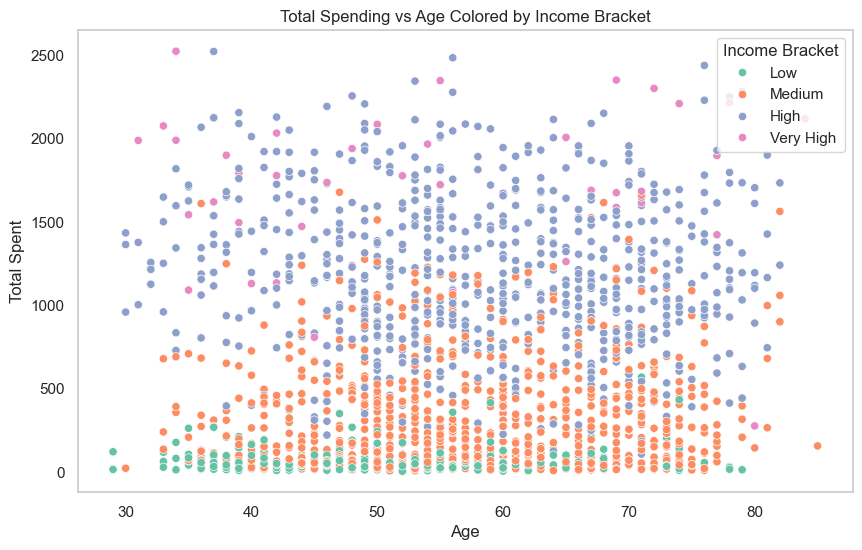

In [102]:
#Total Spending vs Age Colored by Income Bracket
# Create Income Bracket
bins = [0, 30000, 60000, 90000, 120000]
labels = ['Low', 'Medium', 'High', 'Very High']
customer_data['Income_Bracket'] = pd.cut(customer_data['Income'], bins=bins, labels=labels)

# --- Scatter Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Age', y='Total_Spent', hue='Income_Bracket', palette='Set2')
plt.title('Total Spending vs Age Colored by Income Bracket')
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.grid(False)
plt.legend(title='Income Bracket')
plt.savefig('Total Spending vs Age Colored by Income Bracket.png')
plt.show()

What this chart shows:

This one compares how much people of different ages are spending, and it uses colors to show how much money they make (their income bracket).

Key takeaways:

Spending tends to grow with age — up to a point
People in their 30s to 50s are generally spending more than younger folks. That’s likely because they have more stable jobs, families, or higher financial responsibilities.

Income really matters
The color differences show that people who earn more money tend to spend more, no matter their age. Even younger people who are in high income brackets are spending more than their peers.

Older, high-income folks are the big spenders
The highest spenders are often middle-aged or older adults who earn a lot. These are the kind of customers that might respond well to premium offers or exclusive deals.

# --- Deals vs Spending ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='NumDealsPurchases', y='Total_Spent', color='coral')
plt.title('Spending vs Number of Deals Purchased')
plt.xlabel('Number of Deals Purchases')
plt.ylabel('Total Spent')
plt.grid(False)
plt.savefig('Spending vs Number of Deals Purchased.png')
plt.show()

**Spending vs Number of Deals Purchased**

Observations:

Positive correlation: There’s a clear upward trend — as the number of deals purchased increases, total spending tends to increase as well.

Non-linear growth: Spending grows more rapidly with higher deal purchases, suggesting possible bulk buying or higher-value deals being bought in greater numbers.

Outliers: A few individuals with a relatively low number of deals still have high spending — maybe due to premium-priced deals.

Possible Insight:
Customers who purchase more deals tend to spend significantly more, suggesting loyalty or deal satisfaction. Targeting these high-frequency users with personalized offers could further boost spending.

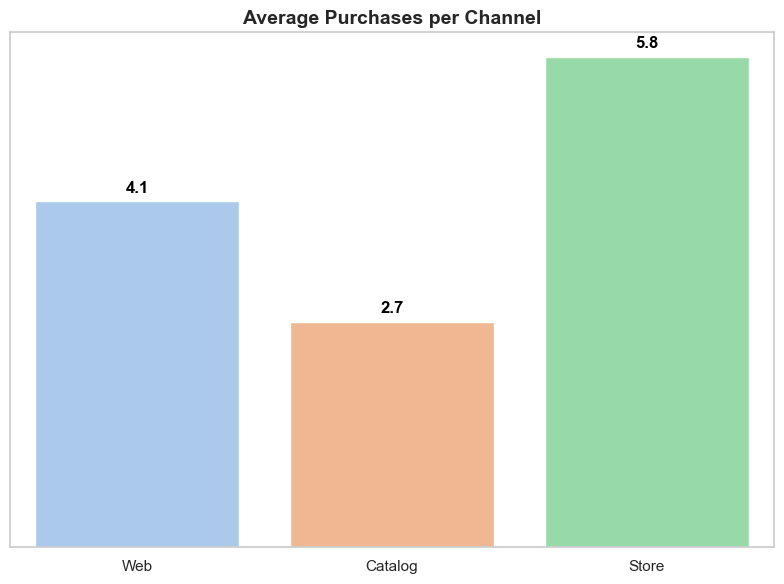

In [108]:
# Set seaborn style
sns.set(style="whitegrid")

# Calculate average purchases per channel
channel_purchases = customer_data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

# Convert to long-form DataFrame for plotting
channel_df = pd.DataFrame({
    'Channel': ['Web', 'Catalog', 'Store'],
    'Average_Purchases': channel_purchases.values
})

# Plot
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Channel', y='Average_Purchases', data=channel_df, palette='pastel')

# Add data labels
for index, row in channel_df.iterrows():
    barplot.text(index, row['Average_Purchases'] + 0.1, f"{row['Average_Purchases']:.1f}",
                 color='black', ha="center", fontweight='bold')

# Titles and labels
plt.title('Average Purchases per Channel', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.grid(False)

# Save the plot
plt.tight_layout()
plt.savefig("purchases_per_channel.png")
plt.show()

**Insight:**

Looks like there are roughly the same number of users across all three channels (around 2236–2237), but the average number of purchases per user varies:

Store users are more active (avg ~5.8 purchases)

Web users are moderately active (~4.1)

Catalog users are least active (~2.7)

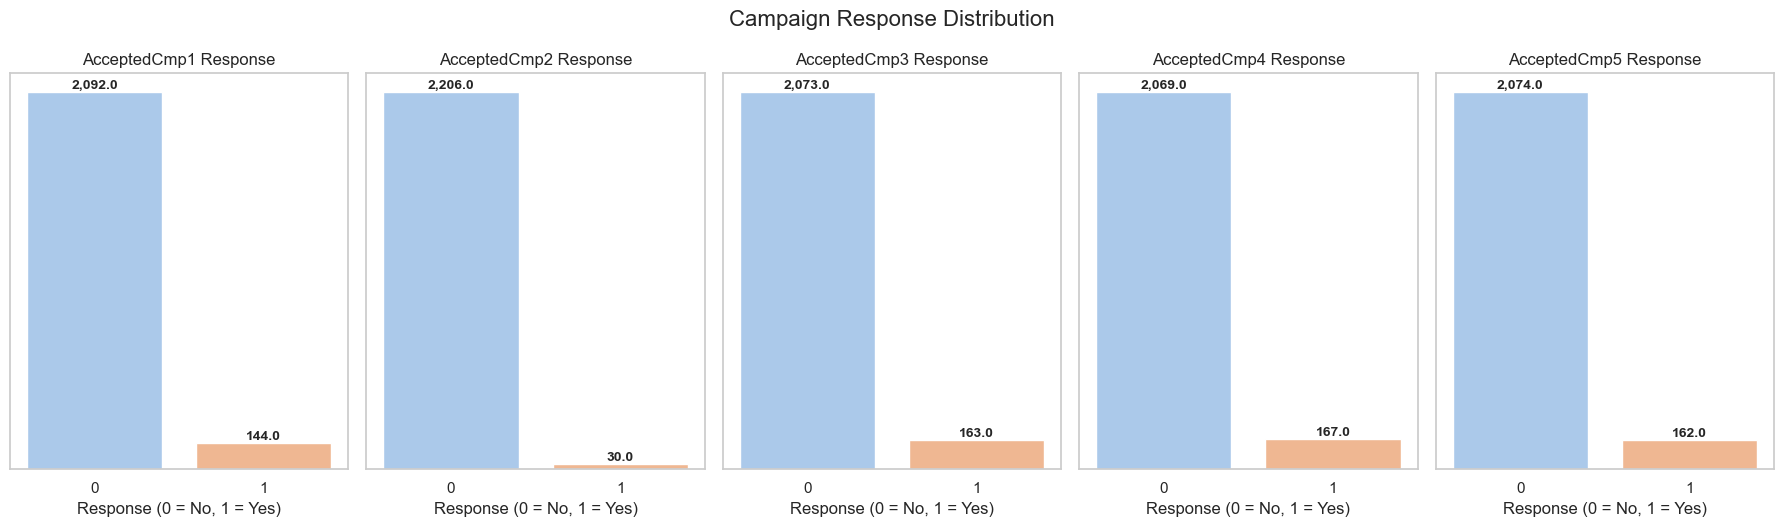

In [113]:
# List of campaign columns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Create a plot for each campaign showing count of 0s and 1s
fig, axs = plt.subplots(1, len(campaign_cols), figsize=(18, 5))

for i, col in enumerate(campaign_cols):
    ax = axs[i]
    sns.countplot(data=customer_data, x=col, ax=ax, palette='pastel')

    # Add data labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:,}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Customize plot appearance
    ax.set_title(f'{col} Response')
    ax.set_xlabel("Response (0 = No, 1 = Yes)")
    ax.set_ylabel("")              
    ax.set_yticks([])              

plt.tight_layout()
plt.suptitle("Campaign Response Distribution", fontsize=16, y=1.05)
plt.show()

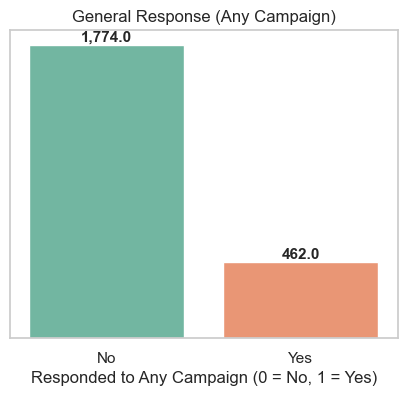

In [131]:
# summary plot for general_response too, to quickly show overall responsiveness
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
customer_data[campaign_cols] = customer_data[campaign_cols].apply(lambda col: col.astype(int))
customer_data['general_response'] = customer_data[campaign_cols].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(5, 4))
sns.countplot(data=customer_data, x='general_response', palette='Set2')

# Add count labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:,}', 
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("General Response (Any Campaign)")
plt.xlabel("Responded to Any Campaign (0 = No, 1 = Yes)")
plt.ylabel("")
plt.yticks([])
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig("General Response (Any Campaign).png")
plt.show()

Perform a comparative analysis between:

Customers who responded to at least one campaign (general_response = 1)

Customers who never responded to any campaign (general_response = 0)

In [150]:
responders = customer_data[customer_data['general_response'] == 1]
non_responders = customer_data[customer_data['general_response'] == 0]

# Comparing the average values for key numeric columns
comparison = pd.DataFrame({
    "Responders (mean)": responders.mean(numeric_only=True),
    "Non-Responders (mean)": non_responders.mean(numeric_only=True)
})

comparison["Difference"] = comparison["Responders (mean)"] - comparison["Non-Responders (mean)"]
print(comparison.sort_values(by="Difference", ascending=False))


                     Responders (mean)  Non-Responders (mean)    Difference
Income                    65095.902597           48529.728298  16566.174300
Total_Spent                1095.400433             478.529312    616.871121
MntWines                    610.971861             224.216460    386.755401
MntMeatProducts             289.987013             134.949831    155.037182
MntGoldProds                 63.086580              39.007892     24.078688
MntFishProducts              54.984848              32.992108     21.992740
MntSweetProducts             39.980519              23.720970     16.259550
MntFruits                    36.389610              23.642052     12.747559
NumCatalogPurchases           4.458874               2.195603      2.263271
NumStorePurchases             7.008658               5.479707      1.528951
NumWebPurchases               5.209957               3.795378      1.414579
general_response              1.000000               0.000000      1.000000
Age         

✅ Key Features Positively Associated with Responders

Income (+16.5k) - Responders tend to have much higher income → income is a strong predictor.
Total_Spent (+617) - Responders spend significantly more overall → good indicator of engagement.
All Spending Categories - (Wines, Meat, Gold, etc.)	Every product category shows higher mean among responders → segment-based targeting is viable.
Catalog, Store, Web Purchases - More purchase activity across all channels → behavior-driven predictions work.
Age (+0.84)	Slightly older on average → possibly more stable financially.

⚠️ Features Inversely Related to Responders

Feature	Insight
Kidhome, Teenhome, Total_Kids - Responders tend to have fewer children → possibly more disposable income or time.
NumDealsPurchases (−0.42) - Responders are less driven by deals → they value brand/products more than discounts.
NumWebVisitsMonth (−0.77) - Surprisingly, responders visit the site slightly less frequently — maybe they convert faster or use other channels.
Recency (−1.09)	Slightly more recent purchase behavior among responders — could signal more current engagement.

In [144]:
# Categorical Breakdown
for col in ['Education', 'Marital_Status', 'Complain', 'Age_Group', 'Income_Bracket']:
    print(f"\n--- {col} ---")
    print(pd.crosstab(customer_data[col], customer_data['general_response'], normalize='index') * 100)



--- Education ---
general_response          0          1
Education                             
2n Cycle          81.094527  18.905473
Basic             88.888889  11.111111
Graduation        79.573712  20.426288
Master            79.729730  20.270270
PhD               76.701031  23.298969

--- Marital_Status ---
general_response           0          1
Marital_Status                         
Absurd             50.000000  50.000000
Alone              66.666667  33.333333
Divorced           80.086580  19.913420
Married            78.935185  21.064815
Single             79.540710  20.459290
Together           80.103806  19.896194
Widow              75.324675  24.675325
YOLO              100.000000   0.000000

--- Complain ---
general_response          0          1
Complain                              
0                 79.241877  20.758123
1                 90.000000  10.000000

--- Age_Group ---
general_response          0          1
Age_Group                             
21–30        

**Interpretation:** 

People with higher education (like PhDs) are more likely to respond (23.3%) than those with only basic education (11.1%).

🔎 Insights from other sections:
✅ Marital_Status
Widows (24.7%) and people who are Alone (33.3%) tend to respond more than Married or Together individuals.

“YOLO” = 0% response — likely an error or quirky entry. Worth cleaning.

✅ Complain
People who have complained in the last 2 years are less likely to respond (only 10%).

✅ Age_Group
The youngest (21–30) and oldest (81–100) age groups are most responsive:

21–30: 50% response

81–100: 41.7% response

✅ Income_Bracket
Clear pattern: The richer, the more likely they are to respond:

Very High income: 84.4% responded

Low income: Only 7% responded

🧠 Conclusion
From your data, customers who are:
Older or very young
Well educated
Not poor
Didn’t complain
Widowed or living alone
…are more likely to respond to campaigns.

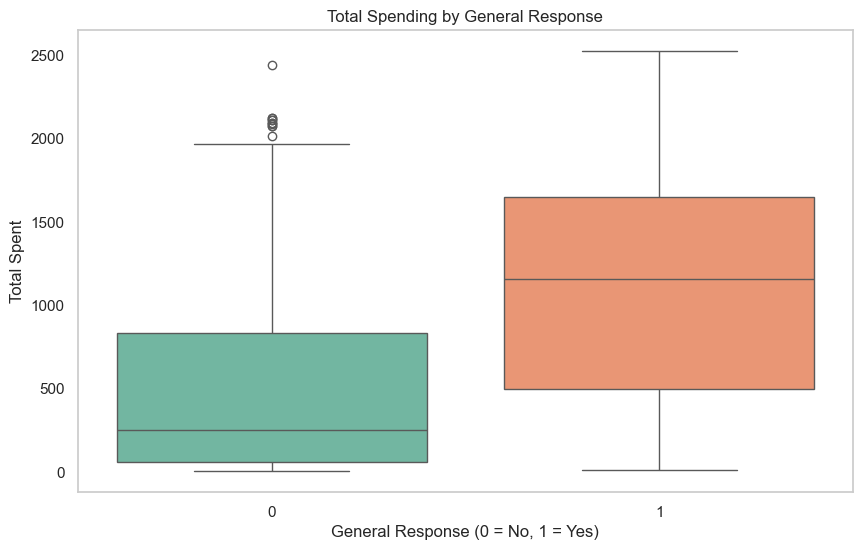

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_data, x='general_response', y='Total_Spent', palette='Set2')
plt.title("Total Spending by General Response")
plt.xlabel("General Response (0 = No, 1 = Yes)")
plt.ylabel("Total Spent")
plt.grid(False)
plt.show()

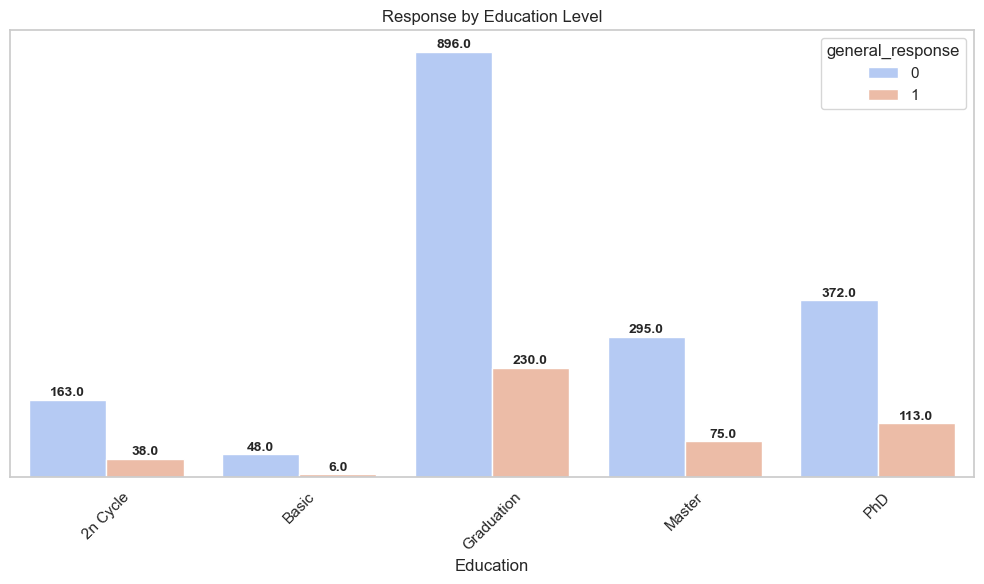

In [133]:
# General response by Education Level
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=customer_data, x='Education', hue='general_response', palette='coolwarm')

# Add data labels on top of each bar with spacing
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:,}', 
                    (p.get_x() + p.get_width() / 2., height + 1), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize plot appearance
ax.set_ylabel("")           
ax.set_yticks([])          
plt.title('Response by Education Level')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.savefig("General Response (Any Campaign) by Education_level.png")
plt.show()

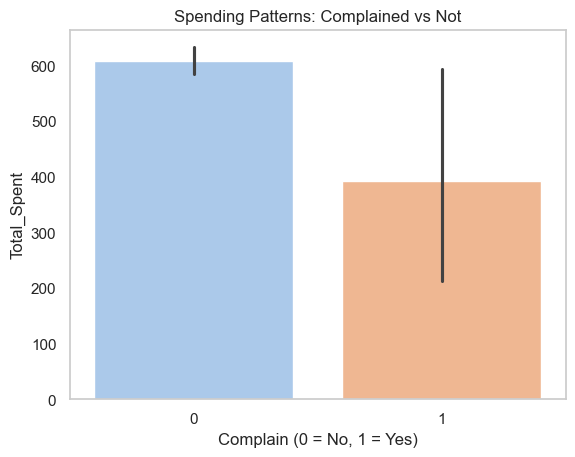

In [161]:
# Spending Patterns: Complained vs Not
# Assuming spending columns are these:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
customer_data['Total_Spend'] = customer_data[spending_cols].sum(axis=1)

sns.barplot(data=customer_data, x='Complain', y='Total_Spent', palette='pastel')
plt.title("Spending Patterns: Complained vs Not")
plt.xlabel("Complain (0 = No, 1 = Yes)")
plt.grid(False)
plt.savefig('Spending Patterns: Complained vs Not.png')
plt.show()


In [165]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2236 non-null   int64   
 1   Year_Birth           2236 non-null   int64   
 2   Education            2236 non-null   category
 3   Marital_Status       2236 non-null   category
 4   Income               2236 non-null   float64 
 5   Kidhome              2236 non-null   int64   
 6   Teenhome             2236 non-null   int64   
 7   Dt_Customer          2236 non-null   object  
 8   Recency              2236 non-null   int64   
 9   MntWines             2236 non-null   int64   
 10  MntFruits            2236 non-null   int64   
 11  MntMeatProducts      2236 non-null   int64   
 12  MntFishProducts      2236 non-null   int64   
 13  MntSweetProducts     2236 non-null   int64   
 14  MntGoldProds         2236 non-null   int64   
 15  NumDealsPurchases    2236 

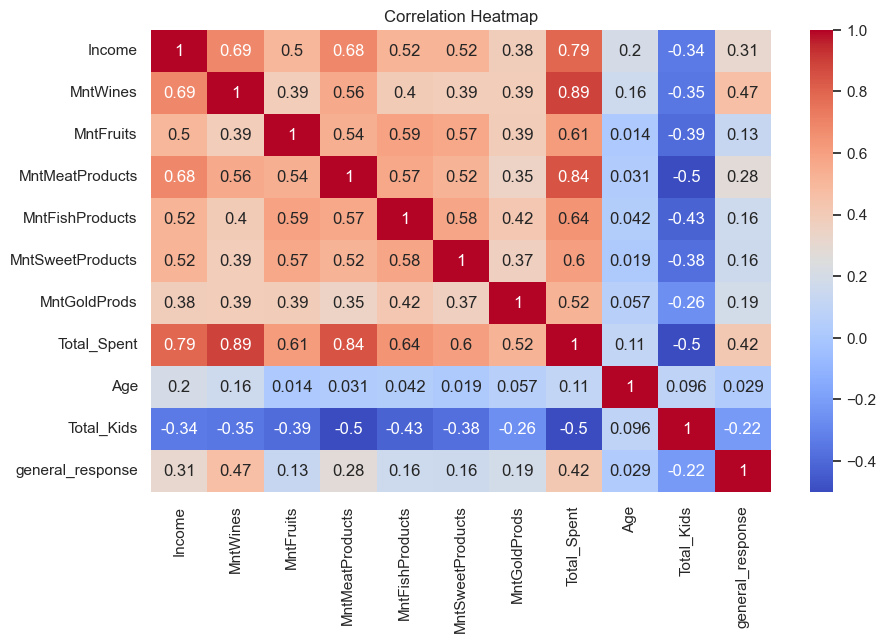

In [167]:
# relevant numeric columns
numeric_cols = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spent', 'Age', 'Total_Kids', 'general_response']
plt.figure(figsize=(10,6))
sns.heatmap(customer_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [204]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2236 non-null   int64   
 1   Year_Birth           2236 non-null   int64   
 2   Education            2236 non-null   category
 3   Marital_Status       2236 non-null   category
 4   Income               2236 non-null   float64 
 5   Kidhome              2236 non-null   int64   
 6   Teenhome             2236 non-null   int64   
 7   Dt_Customer          2236 non-null   object  
 8   Recency              2236 non-null   int64   
 9   MntWines             2236 non-null   int64   
 10  MntFruits            2236 non-null   int64   
 11  MntMeatProducts      2236 non-null   int64   
 12  MntFishProducts      2236 non-null   int64   
 13  MntSweetProducts     2236 non-null   int64   
 14  MntGoldProds         2236 non-null   int64   
 15  NumDealsPurchases    2236 

## MACHINE LEARNING


In [218]:
# Encode categorical variables
cat_cols = ['Age_Group', 'Marital_Status', 'Education', 'Complain', 'Income_Bracket']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    customer_data[col] = le.fit_transform(customer_data[col])
    label_encoders[col] = le
    

df = customer_data[['general_response','Income', 'Total_Spent', 'NumCatalogPurchases', 'NumStorePurchases', 
            'NumWebPurchases', 'Total_Kids', 'NumWebVisitsMonth', 'Income_Bracket']]
df

,general_response,Income,Total_Spent,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,Total_Kids,NumWebVisitsMonth,Income_Bracket
0,0,58138.0,1617,10,4,8,0,7,2
1,0,46344.0,27,1,2,1,2,5,2
2,0,71613.0,776,2,10,8,0,4,0
3,0,26646.0,53,0,4,2,1,6,1
4,0,58293.0,422,3,6,5,1,5,2
...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,1341,3,4,9,1,5,0
2236,1,64014.0,444,2,5,8,3,7,0
2237,1,56981.0,1241,3,13,2,0,6,2
2238,0,69245.0,843,5,10,6,1,3,0


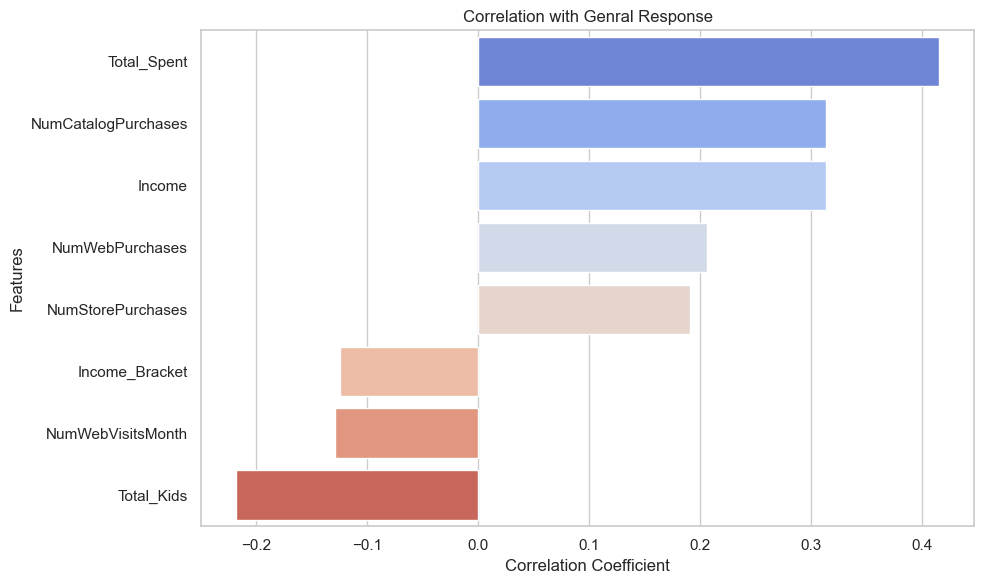

In [220]:
# Correlation with target only
correlation = df.corr()['general_response'].sort_values(ascending=False).drop('general_response')

plt.figure(figsize=(10,6))
sns.barplot(
    x=correlation.values,
    y=correlation.index,
    hue=correlation.index,
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title("Correlation with Genral Response")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Logistic Regression - Accuracy: 0.8237
   Actual  Predicted
0       0          0
1       0          0
2       1          0
3       0          0
4       0          0
5       0          0
6       1          1
7       0          0
8       0          0
9       0          0

Random Forest - Accuracy: 0.8482
   Actual  Predicted
0       0          0
1       0          0
2       1          0
3       0          0
4       0          0
5       0          0
6       1          1
7       0          0
8       0          0
9       0          0

XGBoost - Accuracy: 0.8281
   Actual  Predicted
0       0          0
1       0          0
2       1          0
3       0          0
4       0          0
5       0          0
6       1          1
7       0          0
8       0          0
9       0          1


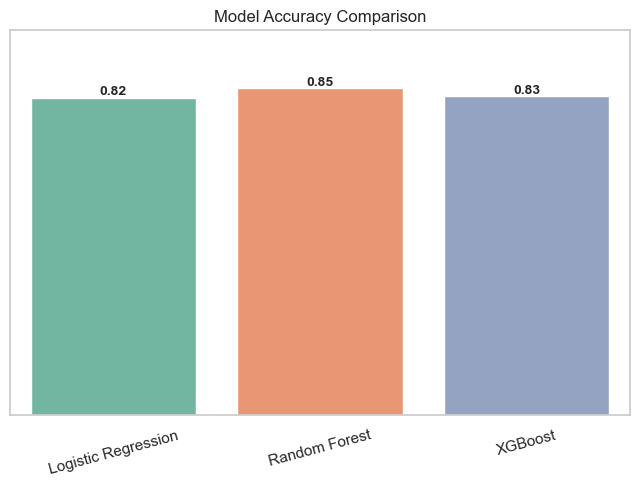


✅ Best model with highest accuracy: Random Forest


In [238]:
# === Features and Target ===
X = df.drop('general_response', axis=1)
y = df['general_response']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# Model Training
# Train each model, predict, and evaluate accuracy
# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': predictions
    }

    print(f"\n{name} - Accuracy: {accuracy:.4f}")
    print(pd.DataFrame({
        'Actual': y_test.values,
        'Predicted': predictions
    }).head(10))

# === Accuracy Comparison Plot ===
# === Improved Accuracy Comparison Plot ===
plt.figure(figsize=(8,5))
accuracies = [v['accuracy'] for v in results.values()]
bars = sns.barplot(x=list(results.keys()), y=accuracies, palette="Set2")

# Add data labels on top of bars
for bar, acc in zip(bars.patches, accuracies):
    height = bar.get_height()
    bars.annotate(f'{acc:.2f}', 
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Model Accuracy Comparison")
plt.ylabel("")           
plt.yticks([])           
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(False)         
plt.show()


# === Predicted vs Actual Visualization for Best Model ===
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_predictions = results[best_model_name]['predictions']
print(f"\n✅ Best model with highest accuracy: {best_model_name}")

The model with the best accuracy score was **Random Forest** with a score of **0.8482 (85%)**. This is above average and not too bad but probably fine tuning the model will give better accuracy results.

In [243]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Initialize the base model
rf = RandomForestClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_rf = grid_search.best_estimator_
best_rf_preds = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, best_rf_preds)

print(f"Tuned Random Forest Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, best_rf_preds))
print("Classification Report:\n", classification_report(y_test, best_rf_preds))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.8482
Confusion Matrix:
 [[343  12]
 [ 56  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       355
           1       0.76      0.40      0.52        93

    accuracy                           0.85       448
   macro avg       0.81      0.68      0.72       448
weighted avg       0.84      0.85      0.83       448



In [246]:
# Updated model with class_weight
rf_weighted = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced', 
    random_state=42
)

# Fit model
rf_weighted.fit(X_train, y_train)

# Predict
weighted_preds = rf_weighted.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, weighted_preds)
print(f"Weighted Random Forest Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, weighted_preds))
print("Classification Report:")
print(classification_report(y_test, weighted_preds))

Weighted Random Forest Accuracy: 0.8415
Confusion Matrix:
[[344  11]
 [ 60  33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       355
           1       0.75      0.35      0.48        93

    accuracy                           0.84       448
   macro avg       0.80      0.66      0.69       448
weighted avg       0.83      0.84      0.82       448



✅ What's Improved:
Model still performs well overall with an accuracy of 0.8415, which is quite close to the untuned version.

Class 1 precision remained stable at 0.75, meaning when the model predicts "1", it's usually right.

## WHY PREDICT GENERAL RESPONSE OF CUSTOMERS TO CAMPAIGNS?
🎯 1. Targeted Marketing & Personalization

"general response" refers to whether a customer responds to a campaign (e.g., buying, clicking, engaging). Predicting it helps focus resources on customers most likely to respond.

personalize offers, discounts, or messages for those who are more likely to engage.

💸 2. Cost Efficiency

Instead of wasting budget on people who are unlikely to respond, reduce campaign costs by narrowing target audience.

Predictive models help in avoiding unnecessary marketing spend.

📈 3. Improved Conversion Rates
With focus only on high-probability responders, you're more likely to increase your conversion rates.

Better engagement translates into higher ROI (return on investment).

🤖 4. Automation & Scalability
With a trained model, you can automate decision-making across thousands or millions of customers.

Saves manual effort, and you can scale campaigns easily.

🧠 5. Strategic Insights
A good model tells you which factors drive customer responses—like income, web visits, marital status, etc.

This helps in understanding customer behavior patterns, which is crucial for strategic business planning.

Example:
Imagine you’re working with a company planning to launch a new product. Predicting general response helps the company:

Know who to send samples to

Who to invite for early access

Who to offer loyalty perks to

Instead of guessing, they use data-driven insights—and that’s a game changer.